# 🕸️🧠 Redes Neuronales 🧠🕸️

El objetivo de este ejercicio es comparar el rendimiento de un modelo de red neuronal para clasificación de imágenes utilizando el dataset Fashion MNIST, aplicando un autoencoder para reducción de dimensionalidad. Se evaluará cómo la inclusión del autoencoder afecta el accuracy del modelo, explorando el trade-off entre precisión y eficiencia en el proceso de entrenamiento.

## ✂️🔨⛏️ Importacion de las herramientas a usar ⛏️🔨✂️

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

## 🔍 Cargar y visualizar el dataset 🔎

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


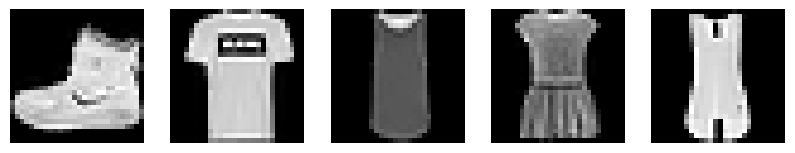

In [2]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


## 🥸 Consigna del Workshop 🥸

 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

Capas a usar.

## 📚 Modelo secuencial para Clasificacion 📚

In [4]:
# Crear el modelo secuencial
model = Sequential([
  Flatten(input_shape=(28, 28)),  # Capa de entrada (Flatten)
  Dense(512, activation='relu'),  # Capa densa con 512 neuronas y ReLU
  Dropout(0.2),  # Dropout del 20%
  Dense(256, activation='relu'),  # Capa densa con 256 neuronas y ReLU
  Dropout(0.2),  # Dropout del 20%
  Dense(128, activation='relu'),  # Capa densa con 128 neuronas y ReLU
  Dense(10, activation='softmax') # Capa de salida con 10 neuronas y softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy del modelo: {accuracy:.4f}")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8857 - loss: 0.3090 - val_accuracy: 0.8716 - val_loss: 0.3592
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8875 - loss: 0.2985 - val_accuracy: 0.8767 - val_loss: 0.3414
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8932 - loss: 0.2856 - val_accuracy: 0.8803 - val_loss: 0.3361
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8944 - loss: 0.2809 - val_accuracy: 0.8761 - val_loss: 0.3493
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8991 - loss: 0.2712 - val_accuracy: 0.8873 - val_loss: 0.3154
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.3144
Accuracy del modelo: 0.8873


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


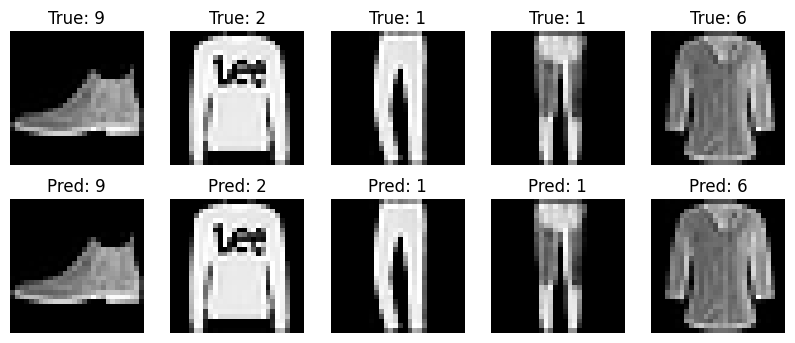

In [14]:
# Obtener algunas imágenes del conjunto de test
n = 5  # Número de imágenes que queremos visualizar
samples = x_test[:n]  # Imágenes originales
true_labels = y_test[:n]  # Etiquetas verdaderas

# Predecir las clases para estas imágenes
predictions = model.predict(samples)

# Convertir las predicciones a clases (índices de la clase con mayor probabilidad)
predicted_labels = np.argmax(predictions, axis=1)

# Visualizar las imágenes originales y las predicciones
fig, axes = plt.subplots(2, n, figsize=(10, 4))

for i in range(n):
    # Imagen original
    axes[0, i].imshow(samples[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f"True: {true_labels[i]}")

    # Imagen con la predicción
    axes[1, i].imshow(samples[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Pred: {predicted_labels[i]}")

plt.show()


In [ ]:
# Explicación para los alumnos:
# Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
# Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
# Además, emplea Dropout para reducir el sobreajuste.


## 📔➕📚 Autoencoder + Modelo Secuencial de Clasificacion 📔➕📚

In [31]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Dimensiones del espacio latente (puedes ajustarlo según los resultados que quieras)
encoding_dim = 64  # Reducción a 64 dimensiones

# Codificador
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(256, activation='relu')(x)
x = Dense(encoding_dim, activation='relu')(x)
encoded = x

# Decodificador
x = Dense(256, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

In [32]:
# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar el autoencoder
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.4233 - val_loss: 0.3049
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.2988 - val_loss: 0.2926
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.2896 - val_loss: 0.2878
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.2840 - val_loss: 0.2840
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2803 - val_loss: 0.2817


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


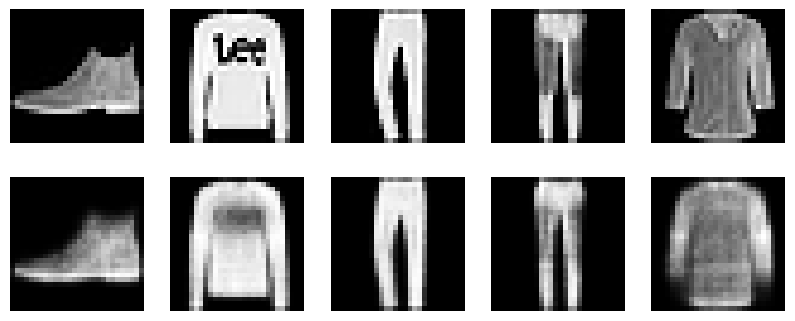

In [33]:
# Evaluación y visualización de reconstrucciones
n = 5
samples = x_test[:n]
reconstructions = autoencoder.predict(samples)

fig, axes = plt.subplots(2, n, figsize=(10, 4))
for i in range(n):
    # Imagen original
    axes[0, i].imshow(samples[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    # Imagen reconstruida
    axes[1, i].imshow(reconstructions[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')
plt.show()

In [37]:
# Extraer el codificador del autoencoder
# encoder = Model(input_img, encoded)

# Obtener las representaciones latentes de las imágenes de entrenamiento y prueba
x_train_encoded = autoencoder.predict(x_train)
x_test_encoded = autoencoder.predict(x_test)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [38]:
# Crear el modelo secuencial
model = Sequential([
  Flatten(input_shape=(28, 28)),  # Capa de entrada (Flatten)
  Dense(512, activation='relu'),  # Capa densa con 512 neuronas y ReLU
  Dropout(0.2),  # Dropout del 20%
  Dense(256, activation='relu'),  # Capa densa con 256 neuronas y ReLU
  Dropout(0.2),  # Dropout del 20%
  Dense(128, activation='relu'),  # Capa densa con 128 neuronas y ReLU
  Dense(10, activation='softmax') # Capa de salida con 10 neuronas y softmax
  ])  # 10 clases para Fashion MNIST

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# Entrenar el modelo
history_autoencoder = model.fit(x_train_encoded, y_train, epochs=5, batch_size=256, validation_data=(x_test_encoded, y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7119 - loss: 0.8181 - val_accuracy: 0.8223 - val_loss: 0.4790
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8273 - loss: 0.4656 - val_accuracy: 0.8313 - val_loss: 0.4657
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8394 - loss: 0.4292 - val_accuracy: 0.8461 - val_loss: 0.4225
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8481 - loss: 0.4085 - val_accuracy: 0.8394 - val_loss: 0.4267
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8541 - loss: 0.3927 - val_accuracy: 0.8515 - val_loss: 0.4054


In [40]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test_encoded, y_test)
print(f"Test accuracy with autoencoder: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3968
Test accuracy with autoencoder: 0.8515


## ⚖️ Comparacion: Sin autoencoder Vs Con autoencoder ⚖️

In [41]:
print(f"The acuuracy without autoencoder is: {accuracy:.4f}")
print(f"The acuuracy with autoencoder is: {test_acc:.4f}")


The acuuracy without autoencoder is: 0.8873
The acuuracy with autoencoder is: 0.8515


## 👑 Conclusion 👑

La pérdida de un pequeño porcentaje de accuracy al usar el autoencoder puede ser positiva o negativa. Es buena si permite una reducción de la dimensionalidad, mayor velocidad de procesamiento, y menor uso de recursos sin afectar gravemente el rendimiento. Este es un caso típico donde el trade-off entre precisión y eficiencia puede ser aceptable dependiendo de los requisitos específicos de la tarea y el entorno de aplicación.